# Neural Network Classification in TensorFlow

## Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

tf.__version__

'2.9.1'

## Input and Output Shapes
(for an image classification example)

```
Image (224x224x3) [batch_size, width, height, color_channels]->Inputs->Machine Learning Algorithm->Outputs (1xnum_classes) [prediction probabilities]
```
```
# 1. Create a model (specific to your problem)
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape = (224,224,3)),
        tf.keras.layers.Dense(100, activation = "relu"),
        tf.keras.layers.Dense(3, activation = "softmax")
    ]
)

# 2. Compile the model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

# 3. Fit the model
model.fit(X_train, y_train, epochs = 5)

# 4. Evaluate the model
model.evaluate(X_test, y_test)
```

|Hyperparameter|Binary Classification|Multiclass Classification|
|--------------|---------------------|-------------------------|
|Input layer shape|Same as the number of features (eg 5 for age, sex, height, weight, smoking status in heart disease prediction)|Same as binary classification|
|Hidden layer(s)|Problem specific, minimum = 1, maximum = unlimited|Same as binary classification|
|Neurons per hidden layer|Problem specific, generally 10 to 100|Same as binary classification|
|Output layer shape|1 (one class or the other)|1 per class (eg 3 for food, person or dog photos)|
|Hidden activation|Usually ReLU (rectified linear unit)|Same as binary classification|
|Output activation|Sigmoid|Softmax|
|Loss function|Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow)|Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow)|
|Optimizer|SGD (stochastic gradient descent)|Same as binary classification|

A classification is where you try to classify something as one thing and/or another

A few types of classification:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [4]:
from sklearn.datasets import make_circles
# Make 1000 examples
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise = 0.03,
    random_state=42
)

Our data is a little hard to understand right now. Lets visualize it

In [4]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


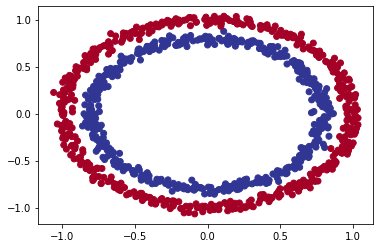

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu);

**Note:** We can use [TensorFlow Playground](http://playground.tensorflow.org/) to quickly model our neural network.

## Input and Output Shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation = "sigmoid", input_shape = (2,), name = "output_layer")
    ], name = "simple_model"
)

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_1.fit(X,y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 9ms/step - loss: 0.7056 - accuracy: 0.5010
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7053 - accuracy: 0.5010
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7050 - accuracy: 0.5010
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7047 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.5010


In [11]:
# Lets try and and improve our model by training for longer
model_1.fit(X, y, epochs = 200, verbose = 0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5020


[0.6931712627410889, 0.5019999742507935]

With an accuracy of ~50% it appears like our model is guessing.

Lets step things up a notch and add an extra layer.

In [15]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape = (2,), name = "hidden_layer"),
        tf.keras.layers.Dense(1, name = "output_layer")
    ], name = "model_2"
)

# 2. Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 4.3095 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2233 - accuracy: 0.4570
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1097 - accuracy: 0.4560
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0002 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8190 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7468 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7300 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7144 - accuracy: 0.4650
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6896 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6398 - accuracy: 0.4680
Epoch 11/

In [16]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5150


[0.6931594610214233, 0.5149999856948853]

Yeah this doesn't look so good.

In [18]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [19]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, input_shape = (2,), name = "hidden_layer_1"), # add a 100 dense neurons
        tf.keras.layers.Dense(10, name = "hidden_layer_2"), # another layer with 10 neurons
        tf.keras.layers.Dense(1, name = "output_layer") 
    ], name = "model_3"
)

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 4.2086 - accuracy: 0.4300
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 4.0658 - accuracy: 0.4150
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 3.9799 - accuracy: 0.4130
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 3.7371 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 9ms/step - loss: 3.5319 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 2.5634 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.8814 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 9ms/step - loss: 0.8334 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 0.8152 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 9ms/step - loss: 0.7994 - accuracy: 0.5000
Epoch 1

In [20]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.5350


[0.6932017207145691, 0.5350000262260437]

To visualize our model's predictions, lets create a function `plot_decision_boundary()`. This function will:

* Take in a trained mode, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between the zones (where each unique class falls)

In [2]:
def plot_decision_boundary(model, X, y):
    """
    Plots decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    y_pred = model.predict(x_in)
    # Check for multi-class classification
    if len(y_pred[0]) > 1:
        print("Multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print("Binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return

313/313 [==============================] - 1s 4ms/step
Binary classification


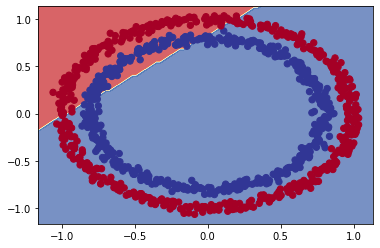

In [25]:
# Check the decisions our model is making
plot_decision_boundary(
    model = model_3,
    X = X,
    y = y
)

Whoops! Looks like this is the problem. Our model is trying to draw a straight line through the data!

In [29]:
# Lets see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150][..., tf.newaxis]
X_reg_test = X_regression[150:][..., tf.newaxis]
y_reg_train = X_regression[:150][..., tf.newaxis]
y_reg_test = X_regression[150:][..., tf.newaxis]

# Fit our model to the regression data
# We can't because input shape is defined but if we hadn't then the following line would work.
model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

Lets change up the model a bit

In [30]:
# Setup a random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, name = "hidden_layer_1"),
        tf.keras.layers.Dense(10, name = "hidden_layer_2"),
        tf.keras.layers.Dense(1, name = "output_layer")
    ], name ="model_3_regression"
)

# 2. compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ["mae"]
)

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 14ms/step - loss: 175.0469 - mae: 175.0469
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 142.7220 - mae: 142.7220
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 111.6871 - mae: 111.6871
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 79.9140 - mae: 79.9140
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 47.6501 - mae: 47.6501
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 13.9854 - mae: 13.9854
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 14.7173 - mae: 14.7173
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 20.5618 - mae: 20.5618
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 10.1260 - mae: 10.1260
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 5.5044 - mae: 5.5044
Epoch 11/100
5/5 [==============================] - 

2/2 [==============================] - 0s 4ms/step


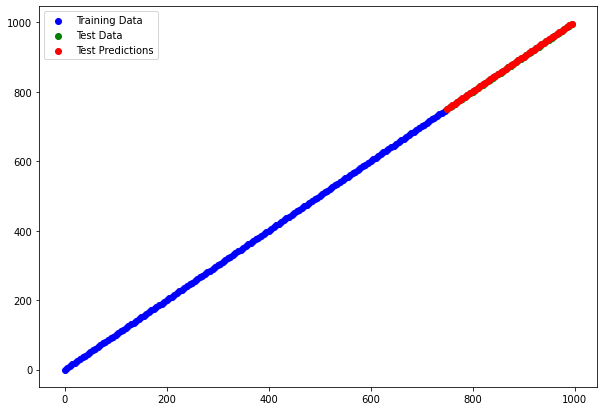

In [32]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Test Data")
plt.scatter(X_reg_test, y_reg_preds, c = "r", label = "Test Predictions")
plt.legend()

## The missing piece: Non-linearity

In [34]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation = tf.keras.activations.relu, name = "output_layer") 
    ], name = "model_5"
)

# 2. Compile the model
model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 4.3426 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 4.3143 - accuracy: 0.4750
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 4.2939 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 4.2869 - accuracy: 0.4600
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 4.2720 - accuracy: 0.4560
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 4.2562 - accuracy: 0.4460
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 4.2228 - accuracy: 0.4370
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 4.2122 - accuracy: 0.4370
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 4.2117 - accuracy: 0.4370
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 4.2114 - accuracy: 0.4370
Epoch 11

In [36]:
# Time to replicate the multi-layer network from Tensorflow playground!
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation = "relu", input_shape = (2,), name = "hidden_layer_1"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_2"), 
        tf.keras.layers.Dense(1, name = "output_layer") 
    ], name = "model_6"
)

# 2. Compile the model
model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),
    metrics = ["accuracy"]
)

# 3. Fit the model
history = model_6.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 19ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 12ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 10ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 9ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 12ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 10ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 9ms/step - loss: 7.7125 - accuracy: 0.5000
Ep

In [37]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 1s 12ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 2s 6ms/step
Binary classification


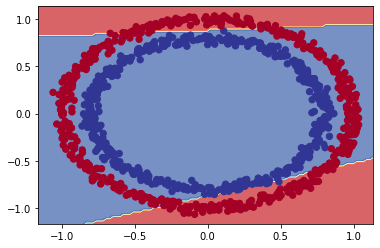

In [38]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

Its starting to realise that the red ones are on the outside but the resulting decision boundaries are still straight lines. Next lets use a sigmoid activation function in the output layer.

In [42]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation = "relu", input_shape = (2,), name = "hidden_layer_1"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_2"), 
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer") 
    ], name = "model_7"
)

# 2. Compile the model
model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = ["accuracy"]
)

# 3. Fit the model
history = model_7.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 1

In [43]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 8ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

313/313 [==============================] - 1s 3ms/step
Binary classification


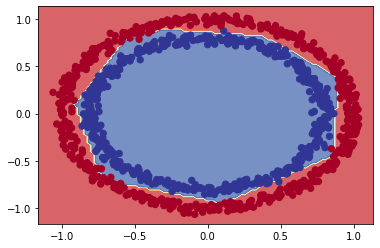

In [44]:
plot_decision_boundary(model_7, X, y)

Yeah, seems to have correctly identified the decision boundary now!

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks

In [45]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

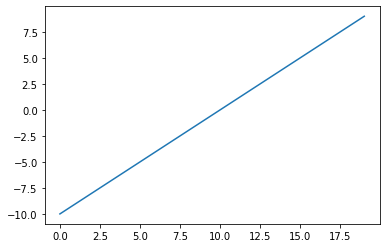

In [47]:
# Visualize our toy tensor
plt.plot(A);

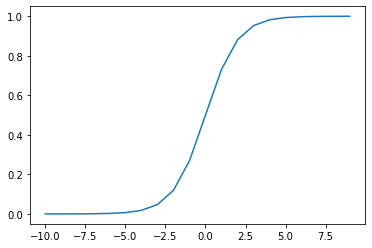

In [50]:
y_A = tf.keras.activations.sigmoid(A)
plt.plot(A, y_A);

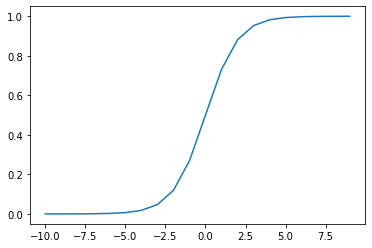

In [52]:
def sigmoid(X):
    return 1/(1 + tf.exp(-X))

y_A = sigmoid(A)
plt.plot(A, y_A);

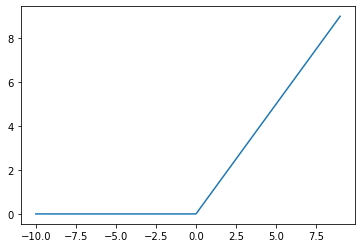

In [54]:
# Lets recreate the relu function
def relu(X):
    return tf.maximum(0, X)

y_A_relu = relu(A)
plt.plot(A, y_A_relu);

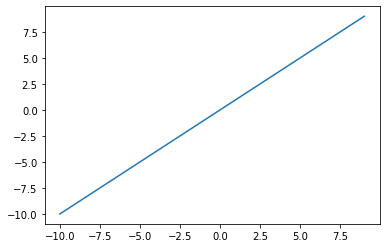

In [56]:
# Lets try the linear activation function
y_A_linear = tf.keras.activations.linear(A)
plt.plot(A, y_A_linear);

## Getting Results Faster

So far we've been training and testing on the same dataset..

However, that is not the right way of going about things. So lets create a training and test set.

In [5]:
# Check how many examples we have
len(X)

1000

In [6]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [7]:
# Lets recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)

model_8 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation = "relu", input_shape = (2,), name = "hidden_layer_1"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "model_8"
)

# 2. Compile the model
model_8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2),
    metrics = ["accuracy"]
)

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs = 100, verbose = 0)

In [8]:
# Evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0245 - accuracy: 0.9950


[0.02450873702764511, 0.9950000047683716]

313/313 [==============================] - 1s 4ms/step
Binary classification
313/313 [==============================] - 1s 3ms/step
Binary classification


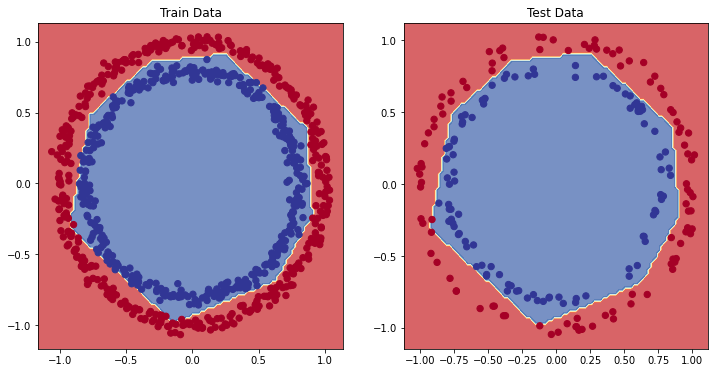

In [10]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Train Data")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test Data")
plot_decision_boundary(model_8, X_test,y_test)

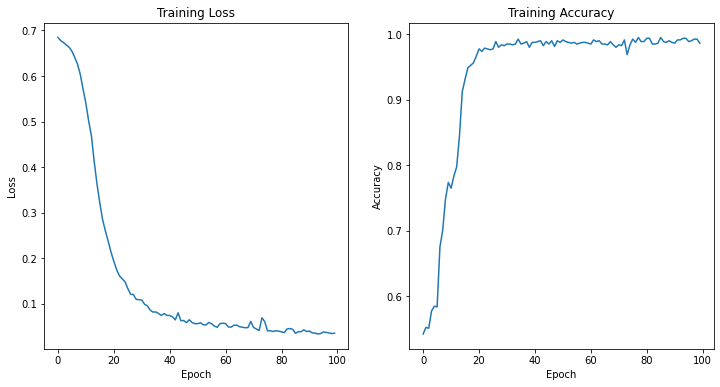

In [19]:
plt.figure(figsize = (12,6));
plt.subplot(1,2,1);
plt.title("Training Loss");
plt.plot(history.history["loss"]);
plt.xlabel("Epoch");
plt.ylabel("Loss");
plt.subplot(1,2,2);
plt.title("Training Accuracy");
plt.plot(history.history["accuracy"]);
plt.xlabel("Epoch");
plt.ylabel("Accuracy");

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [20]:
# Set random seed
tf.random.set_seed(42)


# Create a model (same as model_8)
model_9 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation = "relu", input_shape = (2,), name = "hidden_layer_1"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ]
)

# Compile the model
model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - l

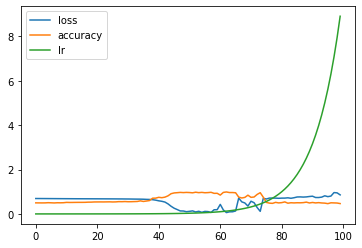

In [22]:
pd.DataFrame(history.history).plot();

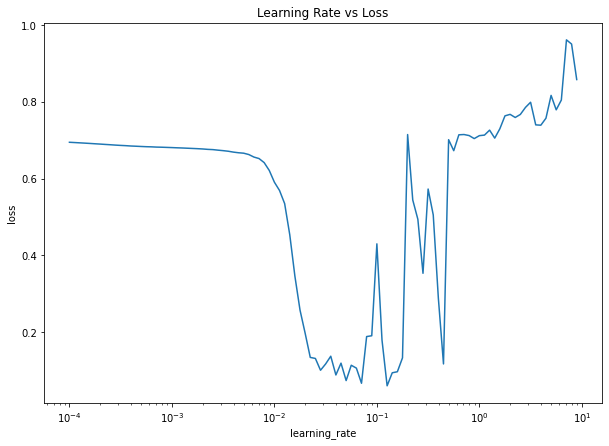

In [25]:
# Plot the learning rate versus the loss
# lrs = 1e-4 * (10 ** (tf.range(100)/200))
plt.figure(figsize = (10, 7))
plt.semilogx(history.history['lr'], history.history['loss'])
plt.xlabel("learning_rate")
plt.ylabel("loss")
plt.title("Learning Rate vs Loss");

Typically you would want the learning rate to be 10 times smaller than the lowest point on the above graph which will be around 0.02 in this case.

In [27]:
# Lets try using a higher ideal learning rate with the same model which is around 0.02 in this case

# Set random seed
tf.random.set_seed(42)


# Create a model (same as model_8)
model_10 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation = "relu", input_shape = (2,), name = "hidden_layer_1"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(1, activation = "sigmoid", name = "output_layer")
    ], name = "model_10"
)

# Compile the model
model_10.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(2e-2),
    metrics = ["accuracy"]
)

# Fit the model
history = model_10.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11

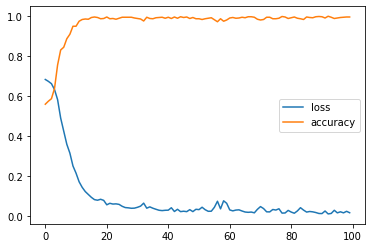

In [28]:
pd.DataFrame(history.history).plot();

This is what I'm talking about! Look at how fast the model has converged.

In [29]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 11ms/step - loss: 0.0186 - accuracy: 0.9950


[0.018565522506833076, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
Binary classification
313/313 [==============================] - 1s 2ms/step
Binary classification


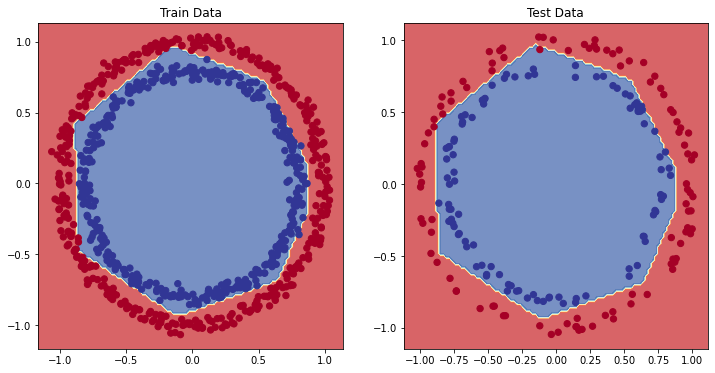

In [30]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Train Data")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test Data")
plot_decision_boundary(model_10, X_test,y_test)

## Classification Evaluation Methods

|Metric Name|Metric Formula|Code|When to use|
|-----------|--------------|----|-----------|
|Accuracy|$Accuracy = \frac{tp+tn}{tp+tn+fp+fn}$|tf.keras.metrics.Accuracy() or sklearn.metrics.accuracy_score()|Default metric for classification problems. Not the best for imbalanced classes|
|Precision|$Precision = \frac{tp}{tp+fp}$|tf.keras.metrics.Precision() or sklearn.metrics.precision_score()|Higher precision leads to less false positives|
|Recall|$Recall=\frac{tp}{tp+fn}$|tf.keras.metrics.Recall() or sklearn.metrics.recall_score()|Higher recall leads to less false negatives|
|F1 Score|$F1 score=2.\frac{precision.recall}{precision + recall}$|sklearn.metrics.f1_score()|Combination of precision and recall, usually a good overall metric for a classification model|
|Confusion Matrix|NA|Custom function or sklearn.metrics.confusion_matrix()|When comparing predictions to ground truth labels to see where the model gets confused. Can be hard to use with large numbers of classes|

## More classification evaluation metrics

Alongside visualizing our model results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix
* Classification Report (from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html))

In [31]:
# Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {accuracy*100:.2f}')

7/7 [==============================] - 0s 12ms/step - loss: 0.0186 - accuracy: 0.9950
Model loss on the test set: 0.018565522506833076
Model accuracy on the test set: 99.50


## Confusion Matrix


In [37]:
# How about a confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)
y_pred_label = np.round(y_pred)

confusion_matrix(y_test,y_pred_label)

7/7 [==============================] - 0s 2ms/step


array([[100,   1],
       [  0,  99]], dtype=int64)

How about we prettify our confusion matrix?

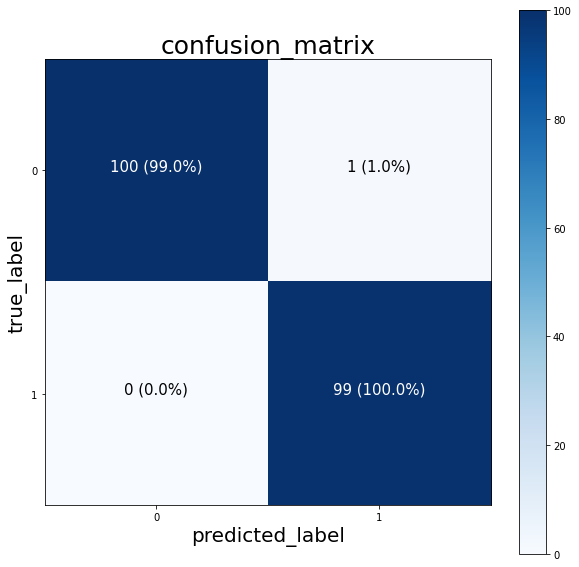

In [49]:
import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_label)
cm_norm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis] # normalize our confusion matrix
n_class = cm.shape[0]

# Lets prettify it
fig, ax = plt.subplots(figsize = figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes

else:
    labels = np.arange(cm.shape[0])

n_classes = len(labels)

# Label the axes
ax.set(title = "confusion_matrix",
       xlabel = "predicted_label",
       ylabel = "true_label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels
);

# Set threshold for different colors
threshold = (cm.max() + cm.min())/2

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(25)

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = "center",
            color = "white" if cm[i,j] > threshold else "black",
            size = 15)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it is known as **multi-class classification**.
* This means if you have 3 different classes, its multi-class classification
* It also means if you have 100 different classes, its multi-class classification

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [52]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

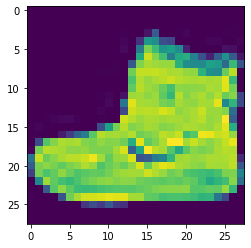

In [54]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [2]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

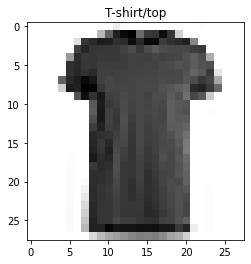

In [57]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary);
plt.title(class_names[train_labels[index_of_choice]]);

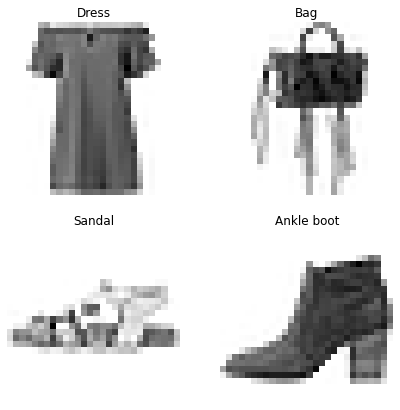

In [60]:
import random
plt.figure(figsize = (7,7))
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary);
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers. However, we're going to have to tweak a few things:
* Input shape = 28*28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded use `CategoricalCrossentropy()`
    * If your labels are integers use `SparseCategoricalCrossentropy()`
* Output layer activation = Softmax (not sigmoid)

In [61]:
train_data.shape

(60000, 28, 28)

`tf.keras.losses.CategoricalCrossentropy()` is for when the labels are in one-hot encoded form. If the labels are provided as integers use `SparseCategoricalCrossentropy()` instead.

In [66]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28,), name = "flatten_layer"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(10, activation = "softmax",name = "output_layer")
    ], name = "model_11"
)

# Compile the model
model_11.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 2.1806 - accuracy: 0.1593 - val_loss: 1.8164 - val_accuracy: 0.2065
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.7143 - accuracy: 0.2436 - val_loss: 1.6538 - val_accuracy: 0.2836
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6341 - accuracy: 0.2814 - val_loss: 1.6034 - val_accuracy: 0.2793
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6040 - accuracy: 0.2860 - val_loss: 1.6026 - val_accuracy: 0.2978
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 1.5899 - accuracy: 0.3003 - val_loss: 1.5707 - val_accuracy: 0.3190
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.5416 - accuracy: 0.3411 - val_loss: 1.5048 - val_accuracy: 0.3583
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.5055 - accuracy: 0.3580 - val_loss: 1.4832 - val_

Neural networks prefer data to be scaled (or normalized). This means they like to have the numbers in the tensor between 0 & 1

In [3]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data /255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [68]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28,), name = "flatten_layer"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(10, activation = "softmax",name = "output_layer")
    ], name = "model_11"
)

# Compile the model
model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

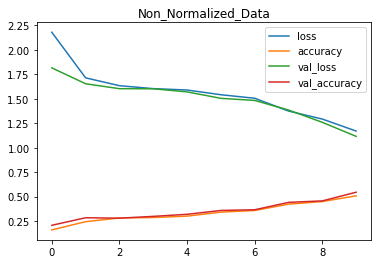

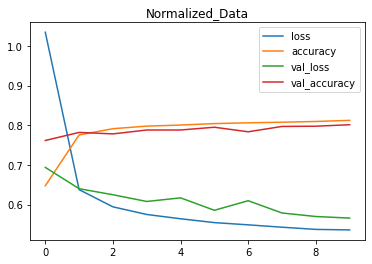

In [70]:
pd.DataFrame(non_norm_history.history).plot(title = "Non_Normalized_Data");
pd.DataFrame(norm_history.history).plot(title = "Normalized_Data");

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when comparing models, its important to make sure that you're comparing them on the same criteria (eg. same architecture but different data or same data but different architectures)

## Finding the ideal learning rate

In [74]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28,), name = "flatten_layer"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(10, activation = "softmax",name = "output_layer")
    ], name = "model_13"
)

# Compile the model
model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
norm_history = model_13.fit(train_data_norm, train_labels, epochs = 40, callbacks = [lr_scheduler],validation_data = (test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

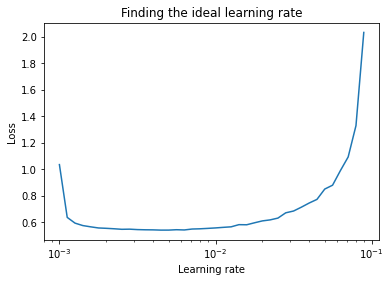

In [75]:
plt.semilogx(norm_history.history['lr'], norm_history.history['loss']);
plt.xlabel('Learning rate');
plt.ylabel('Loss');
plt.title("Finding the ideal learning rate");

The ideal learning rate appears to be $10^{-3}$

In [6]:
# Lets refit a model with ideal learning rate
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28,), name = "flatten_layer"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_1"),
        tf.keras.layers.Dense(4, activation = "relu", name = "hidden_layer_2"),
        tf.keras.layers.Dense(10, activation = "softmax",name = "output_layer")
    ], name = "model_14"
)

# Compile the model
model_14.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = ["accuracy"]
)

# Fit the model
norm_history = model_14.fit(train_data_norm, train_labels, epochs = 20, validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

## Evaluating our multi-class Classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Lets go through the top 2

In [4]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def make_confusion_matrix(model, X_test, y_test, classes = None, figsize = (10,10), text_size = 15):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, tf.argmax(y_pred, axis = 1))
    cm_norm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    n_classes = cm_norm.shape[0]
    fig, ax = plt.subplots(figsize = figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues);
    fig.colorbar(cax);

    if classes:
        labels = classes

    else:
        labels = np.arange(cm.shape[0])

    n_classes = len(labels)

    # Label the axes
    ax.set(title = "confusion_matrix",
           xlabel = "predicted_label",
           ylabel = "true_label",
           xticks = np.arange(n_classes),
           yticks = np.arange(n_classes),
           xticklabels = labels,
           yticklabels = labels
    );

    # Set threshold for different colors
    threshold = (cm.max() + cm.min())/2

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust the label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment = "center",
                color = "white" if cm[i,j] > threshold else "black",
                size = text_size)


In [10]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [22]:
y_pred = model_12.predict(test_data_norm)
cm = confusion_matrix(test_labels, tf.argmax(y_pred, axis = 1))
cm

313/313 [==============================] - 1s 4ms/step


array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

313/313 [==============================] - 1s 4ms/step


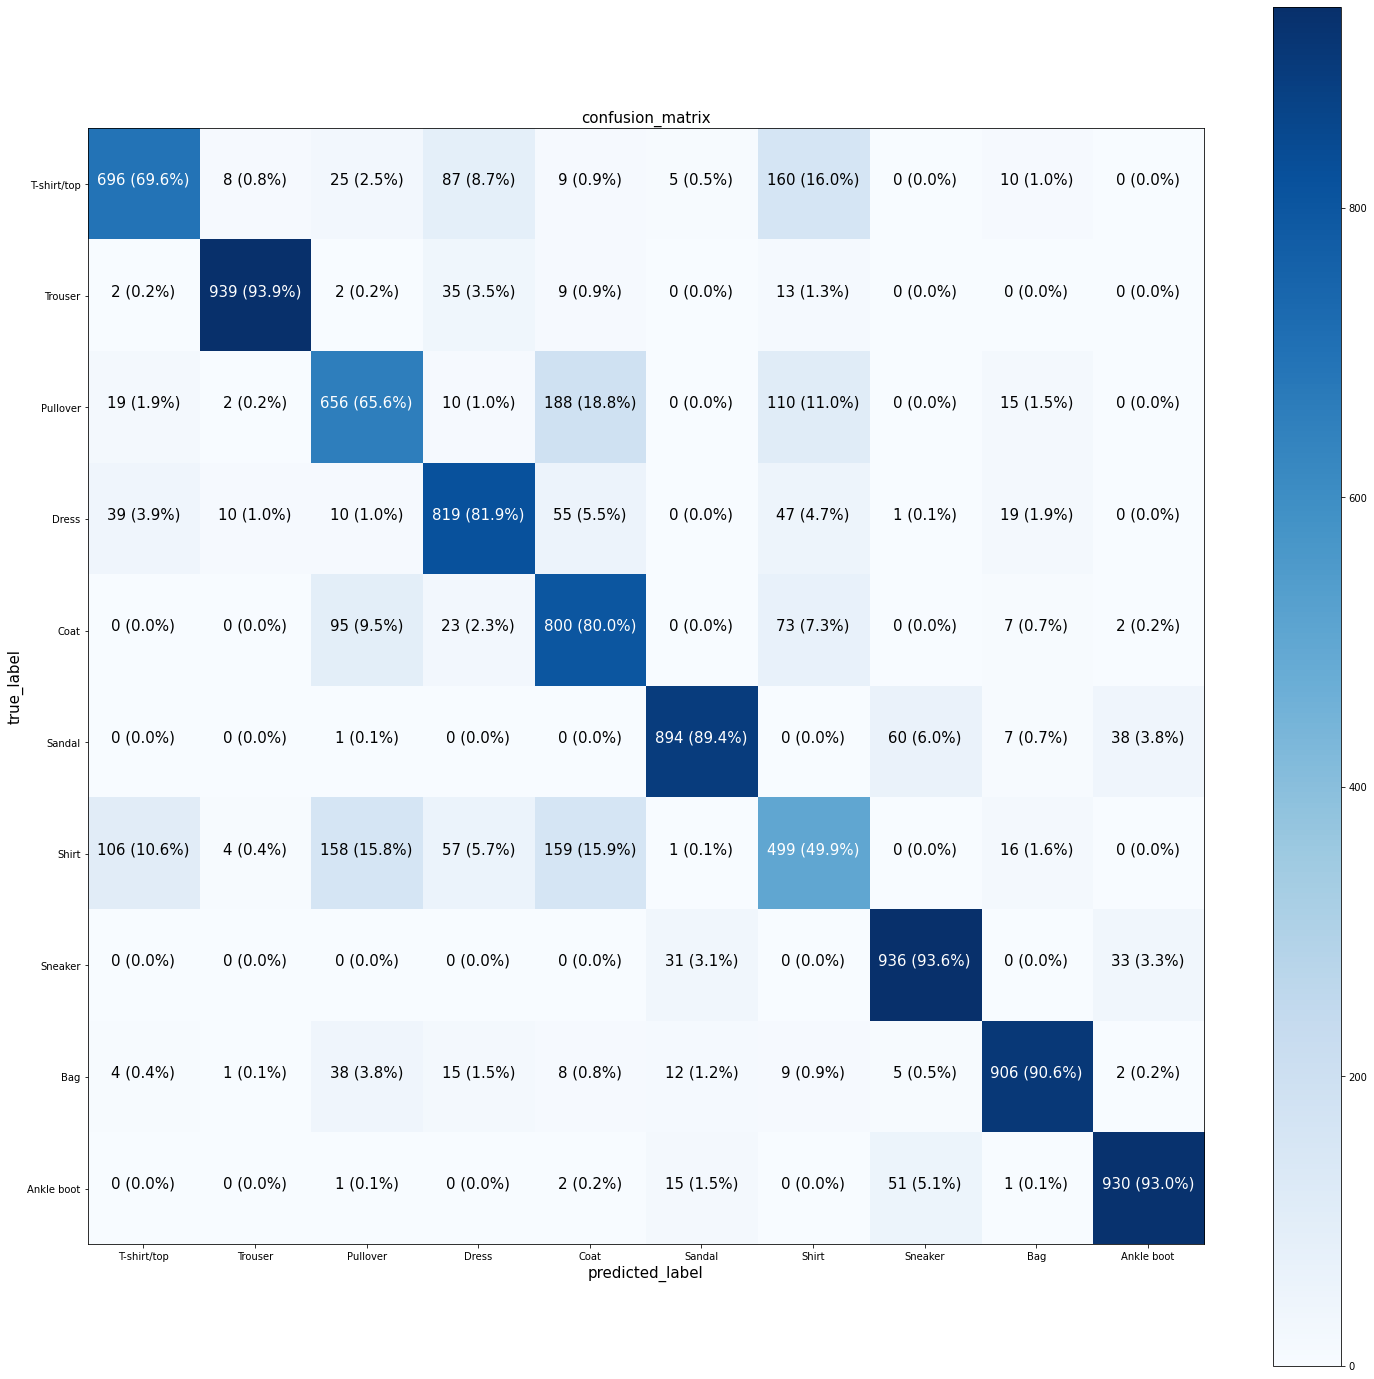

In [30]:
make_confusion_matrix(model_12, test_data_norm, test_labels, classes = class_names, figsize = (25,25))

**Note:** Often when working with images and other forms of visual data, its a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label

In [5]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label
    """
    i = random.randint(0, len(images))
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color = color)

1/1 [==============================] - 0s 29ms/step


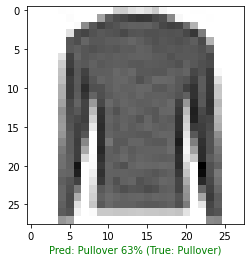

In [37]:
# Check out a random image as well as its prediction
plot_random_image(model = model_12,
                  images = test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels = test_labels,
                  classes = class_names)

## What patterns is our model learning?

In [7]:
model_14.layers

In [8]:
model_14.layers[1]

In [10]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[ 0.7150262 , -0.06077098, -0.997631  , -1.0484313 ],
        [ 0.27732137, -0.47155422, -0.5291648 ,  0.02329281],
        [ 0.7752433 ,  0.5402757 , -1.1288565 , -0.7426152 ],
        ...,
        [-0.39453387,  0.47628626, -0.22641538,  0.25505963],
        [-0.40515777,  0.61810076,  0.23928408, -0.5038764 ],
        [ 0.23884566,  0.11606905, -0.12131353,  0.0435244 ]],
       dtype=float32),
 (784, 4))

Now lets check out the bias vector..

In [12]:
biases, biases.shape

(array([ 2.4485957e-02, -6.1476819e-04, -2.7230155e-01,  8.1124890e-01],
       dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (atleast in the case of a tensorflow dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [16]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
# plot_model(model_14, show_shapes = True)